In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv(r"C:\Users\ayusi\Downloads\Datasets\Housing_price\housing_price_dataset.csv")

In [3]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [4]:
df.round({'Price':0})

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.0
1,2459,3,2,Rural,1980,195014.0
2,1860,2,1,Suburb,1970,306891.0
3,2294,2,1,Urban,1996,206787.0
4,2130,5,2,Suburb,2001,272436.0
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100081.0
49996,2854,2,2,Suburb,1988,374508.0
49997,2979,5,3,Suburb,1962,384111.0
49998,2596,5,2,Rural,1984,380513.0


In [5]:
df.shape

(50000, 6)

In [6]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [7]:
df['Price']=df['Price'].abs()
df['Price']

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 50000, dtype: float64

In [8]:
df[df['Price']==0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price


In [9]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [11]:
plt.style.use('fivethirtyeight')

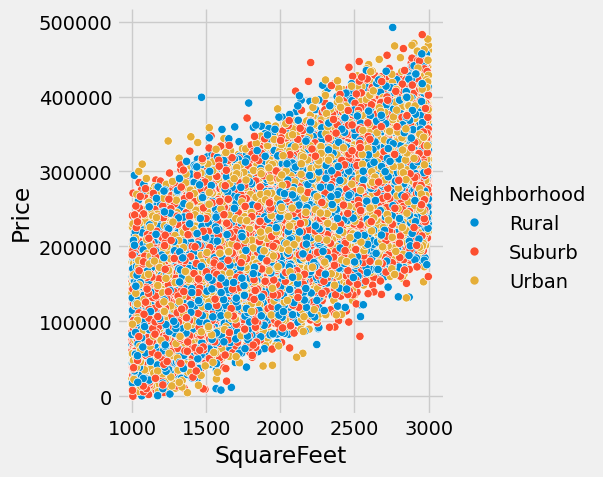

In [12]:
sns.relplot(x='SquareFeet',y='Price',hue='Neighborhood',data=df)

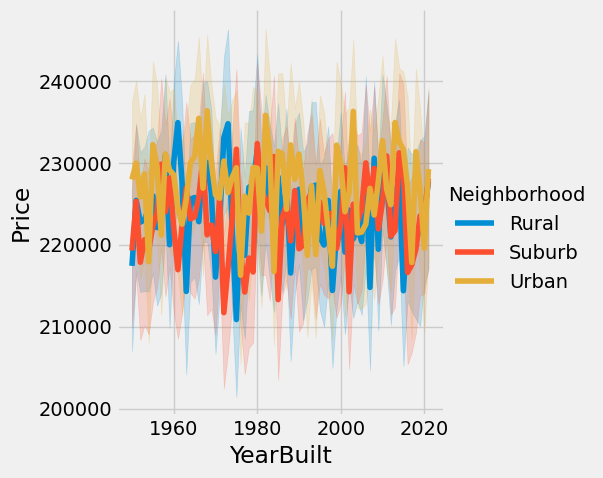

In [13]:
sns.relplot(x='YearBuilt',y='Price',hue='Neighborhood',kind='line',data=df)

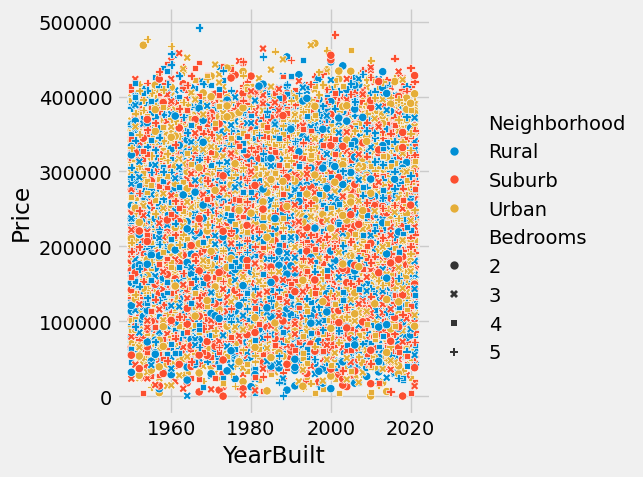

In [14]:
sns.relplot(x='YearBuilt',y='Price',hue='Neighborhood',kind='scatter',style='Bedrooms',data=df)

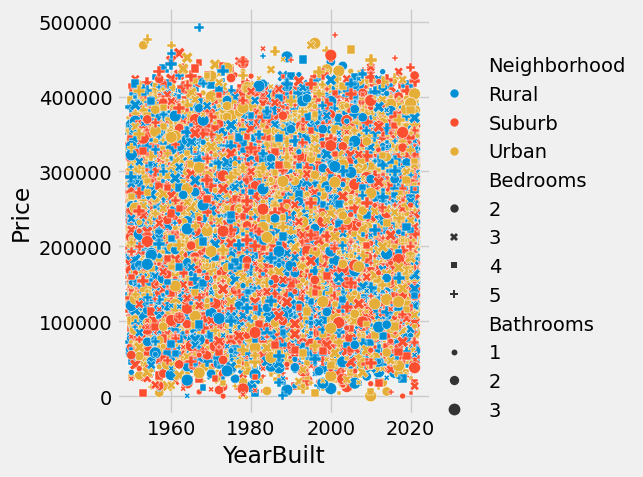

In [15]:
sns.relplot(x='YearBuilt',y='Price',hue='Neighborhood',kind='scatter',style='Bedrooms',size='Bathrooms',data=df)

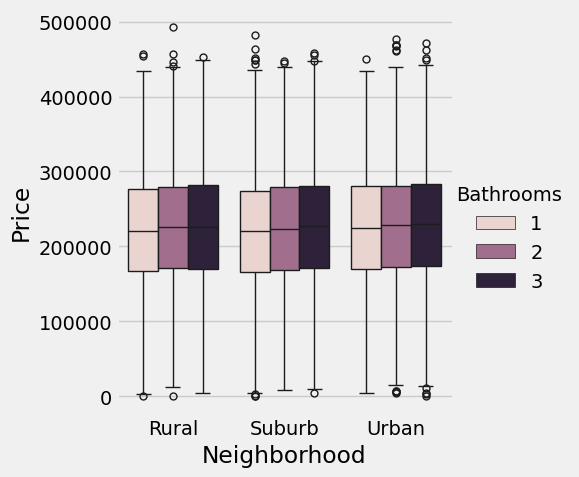

In [16]:
sns.catplot(x='Neighborhood',y='Price',data=df,kind='box',hue='Bathrooms')

In [17]:
price=df['Price']
x=df.iloc[:,:5]

In [18]:
price

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 50000, dtype: float64

In [19]:
price.round()

0        215355.0
1        195014.0
2        306891.0
3        206787.0
4        272436.0
           ...   
49995    100081.0
49996    374508.0
49997    384111.0
49998    380513.0
49999    221619.0
Name: Price, Length: 50000, dtype: float64

In [20]:
x

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2126,4,1,Rural,1969
1,2459,3,2,Rural,1980
2,1860,2,1,Suburb,1970
3,2294,2,1,Urban,1996
4,2130,5,2,Suburb,2001
...,...,...,...,...,...
49995,1282,5,3,Rural,1975
49996,2854,2,2,Suburb,1988
49997,2979,5,3,Suburb,1962
49998,2596,5,2,Rural,1984


In [21]:
x

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2126,4,1,Rural,1969
1,2459,3,2,Rural,1980
2,1860,2,1,Suburb,1970
3,2294,2,1,Urban,1996
4,2130,5,2,Suburb,2001
...,...,...,...,...,...
49995,1282,5,3,Rural,1975
49996,2854,2,2,Suburb,1988
49997,2979,5,3,Suburb,1962
49998,2596,5,2,Rural,1984


In [22]:
ohe=OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [23]:
x_=ohe.fit_transform(x[['Neighborhood']])
x_

,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
49995,1.0,0.0,0.0
49996,0.0,1.0,0.0
49997,0.0,1.0,0.0
49998,1.0,0.0,0.0


In [24]:
x= x.join(x_)
x


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,Rural,1969,1.0,0.0,0.0
1,2459,3,2,Rural,1980,1.0,0.0,0.0
2,1860,2,1,Suburb,1970,0.0,1.0,0.0
3,2294,2,1,Urban,1996,0.0,0.0,1.0
4,2130,5,2,Suburb,2001,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,1.0,0.0,0.0
49996,2854,2,2,Suburb,1988,0.0,1.0,0.0
49997,2979,5,3,Suburb,1962,0.0,1.0,0.0
49998,2596,5,2,Rural,1984,1.0,0.0,0.0


In [25]:
x=x.drop(['Neighborhood'],axis=1)

In [26]:
x

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,1.0,0.0,0.0
1,2459,3,2,1980,1.0,0.0,0.0
2,1860,2,1,1970,0.0,1.0,0.0
3,2294,2,1,1996,0.0,0.0,1.0
4,2130,5,2,2001,0.0,1.0,0.0
...,...,...,...,...,...,...,...
49995,1282,5,3,1975,1.0,0.0,0.0
49996,2854,2,2,1988,0.0,1.0,0.0
49997,2979,5,3,1962,0.0,1.0,0.0
49998,2596,5,2,1984,1.0,0.0,0.0


In [27]:
Mmsca=MinMaxScaler()

In [28]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_new=Scaler.fit_transform(x)

In [29]:
x_new


array([[ 0.20786058,  0.44906695, -1.22011292, ...,  1.4136198 ,
        -0.70883636, -0.70508188],
       [ 0.78648033, -0.44673786,  0.00561383, ...,  1.4136198 ,
        -0.70883636, -0.70508188],
       [-0.25434018, -1.34254267, -1.22011292, ..., -0.70740379,
         1.41076284, -0.70508188],
       ...,
       [ 1.6900307 ,  1.34487176,  1.23134057, ..., -0.70740379,
         1.41076284, -0.70508188],
       [ 1.0245311 ,  1.34487176,  0.00561383, ...,  1.4136198 ,
        -0.70883636, -0.70508188],
       [-0.75476808,  1.34487176,  1.23134057, ...,  1.4136198 ,
        -0.70883636, -0.70508188]])

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_new,price,test_size=.20,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
ln= LinearRegression()
model1=ln.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
r2_score(y_test,y_pred1)

0.5756403585147407

In [32]:
from sklearn.linear_model import Lasso
model2=Lasso(alpha=100,selection='random',random_state=123).fit(x_train,y_train)
y_pred2=model2.predict(x_test)
r2_score(y_test,y_pred2)

0.5756613694962267

In [33]:
from sklearn.linear_model import Ridge
model3=Ridge().fit(x_train,y_train)
y_pred3=model3.predict(x_test)
r2_score(y_test,y_pred3)

0.5756565792797566

In [34]:
from sklearn.ensemble import AdaBoostRegressor
model4= AdaBoostRegressor().fit(x_train,y_train)
y_pred4=model4.predict(x_test)
r2_score(y_test,y_pred4)

0.5704558101142723

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
model5= GradientBoostingRegressor(loss= 'absolute_error', learning_rate= .07,n_estimators=100,subsample=0.4).fit(x_train,y_train)
y_pred5=model5.predict(x_test)
r2_score(y_test,y_pred5)

0.5751583397259141

In [36]:
from xgboost import XGBRegressor
model6= XGBRegressor().fit(x_train,y_train)
y_pred6=model6.predict(x_test)
r2_score(y_test,y_pred6)

0.5558030635915683

In [37]:
from sklearn.neighbors import KNeighborsRegressor
model7=KNeighborsRegressor().fit(x_train,y_train)
y_pred7=model7.predict(x_test)
r2_score(y_test,y_pred7)

0.48520983455725986

In [38]:
from sklearn.ensemble import VotingRegressor
model8= VotingRegressor([ 
    ('xgb',XGBRegressor() ),
    ('ls', Lasso(alpha=100,selection='random',random_state=123)),
   ('gbr',GradientBoostingRegressor(loss= 'absolute_error', learning_rate= .07,n_estimators=100,subsample=0.4) ) ]).fit(x_train,y_train)
y_pred8=model8.predict(x_test)
r2_score(y_test,y_pred8)

0.5735172292055892